In [123]:
import pandas as pd

In [124]:
data = pd.read_csv("/Users/sagarjoshi/Desktop/Project/TimeSeries/Train_SU63ISt.csv")

In [125]:
data.head(10)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [126]:
time=pd.to_datetime(data.Datetime)

In [127]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [128]:
time.head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [129]:
train=data

In [130]:
train=train.drop("Datetime",axis=1)

In [131]:
train["Datetime"] = time

In [132]:
train.head()

,ID,Count,Datetime
0,0,8,2012-08-25 00:00:00
1,1,2,2012-08-25 01:00:00
2,2,6,2012-08-25 02:00:00
3,3,2,2012-08-25 03:00:00
4,4,2,2012-08-25 04:00:00


In [133]:
train["year"] = train["Datetime"].dt.year
train['month'] = train['Datetime'].dt.month 
train['day'] = train['Datetime'].dt.day 
train['hour'] = train['Datetime'].dt.hour 


In [134]:
train.head()

,ID,Count,Datetime,year,month,day,hour
0,0,8,2012-08-25 00:00:00,2012,8,25,0
1,1,2,2012-08-25 01:00:00,2012,8,25,1
2,2,6,2012-08-25 02:00:00,2012,8,25,2
3,3,2,2012-08-25 03:00:00,2012,8,25,3
4,4,2,2012-08-25 04:00:00,2012,8,25,4


In [135]:
train = train.drop("Datetime",axis=1)

In [136]:
train.head()

,ID,Count,year,month,day,hour
0,0,8,2012,8,25,0
1,1,2,2012,8,25,1
2,2,6,2012,8,25,2
3,3,2,2012,8,25,3
4,4,2,2012,8,25,4


In [137]:
train.describe()

,ID,Count,year,month,day,hour
count,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000
mean,9143.500000,138.958115,2013.182415,6.581365,15.783465,11.500000
std,5279.435197,153.467461,0.698390,3.420247,8.756735,6.922376
min,0.000000,2.000000,2012.000000,1.000000,1.000000,0.000000
25%,4571.750000,22.000000,2013.000000,4.000000,8.000000,5.750000
50%,9143.500000,84.000000,2013.000000,7.000000,16.000000,11.500000
75%,13715.250000,210.000000,2014.000000,9.000000,23.000000,17.250000
max,18287.000000,1244.000000,2014.000000,12.000000,31.000000,23.000000


In [138]:
train.corr()

,ID,Count,year,month,day,hour
ID,1.000000,0.780628,0.914277,-7.502213e-02,-1.586280e-02,1.311196e-03
Count,0.780628,1.000000,0.674422,2.146660e-03,-3.286123e-03,2.019169e-01
year,0.914277,0.674422,1.000000,-3.152689e-01,-1.126435e-01,0.000000e+00
month,-0.075022,0.002147,-0.315269,1.000000e+00,2.168746e-02,1.230825e-19
day,-0.015863,-0.003286,-0.112644,2.168746e-02,1.000000e+00,1.281977e-20
hour,0.001311,0.201917,0.000000,1.230825e-19,1.281977e-20,1.000000e+00


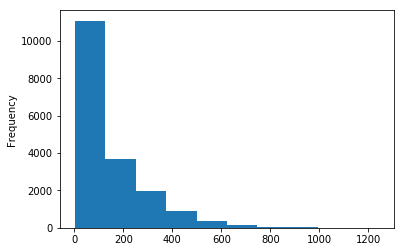

In [139]:
#Uni variate annalysis
train["Count"].plot.hist()

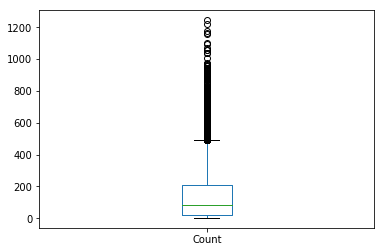

In [140]:
train["Count"].plot.box()

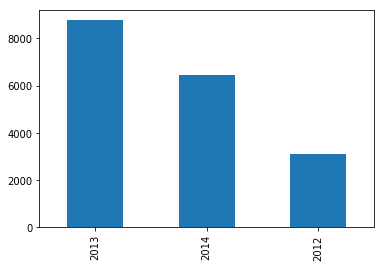

In [141]:
train["year"].value_counts().plot.bar()

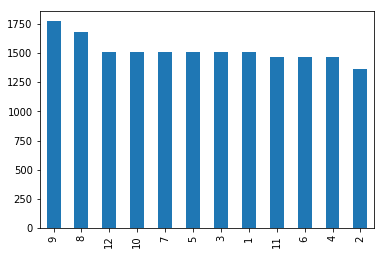

In [142]:
train["month"].value_counts().plot.bar()

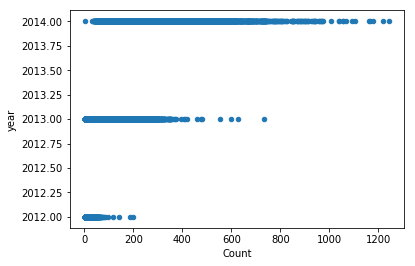

In [143]:
train.plot.scatter("Count","year")

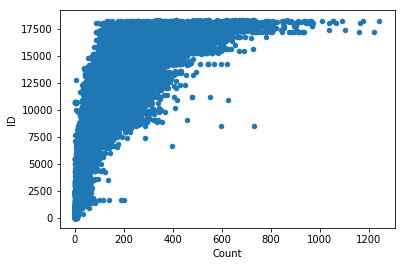

In [144]:
train.plot.scatter("Count","ID")

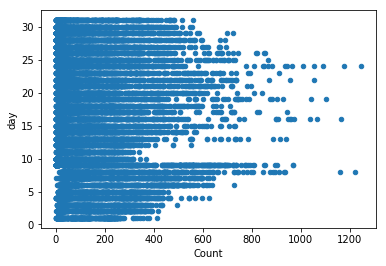

In [145]:
train.plot.scatter("Count","day")

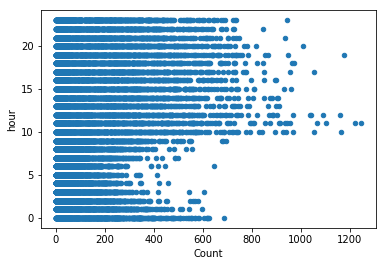

In [146]:
train.plot.scatter("Count","hour")
#most intresting

In [147]:
train.shape

(18288, 6)

In [148]:
train=pd.get_dummies(train)

In [149]:
train.shape

(18288, 6)

In [150]:
train.isnull().sum()
#no missing values

ID       0
Count    0
year     0
month    0
day      0
hour     0
dtype: int64

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
lreg = LinearRegression()

In [153]:
train.head()

,ID,Count,year,month,day,hour
0,0,8,2012,8,25,0
1,1,2,2012,8,25,1
2,2,6,2012,8,25,2
3,3,2,2012,8,25,3
4,4,2,2012,8,25,4


In [154]:
x_train = train.drop("Count",axis=1)

In [155]:
y_train = train["Count"]

In [156]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
test = pd.read_csv("/Users/sagarjoshi/Desktop/Project/TimeSeries/Test_0qrQsBZ.csv")

In [158]:
x_train.shape

(18288, 5)

In [159]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [160]:
temp=pd.to_datetime(test.Datetime)

In [161]:
test=test.drop("Datetime",axis=1)

In [162]:
test["Datetime"]=temp

In [163]:
test.head()

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00


In [164]:
test["year"] = test["Datetime"].dt.year
test['month'] = test['Datetime'].dt.month 
test['day'] = test['Datetime'].dt.day 
test['hour'] = test['Datetime'].dt.hour

In [165]:
test=test.drop("Datetime",axis=1)

In [166]:
test.head()

,ID,year,month,day,hour
0,18288,2014,9,26,0
1,18289,2014,9,26,1
2,18290,2014,9,26,2
3,18291,2014,9,26,3
4,18292,2014,9,26,4


In [167]:
pred=lreg.predict(test)

In [168]:
lreg.score(x_train,y_train)

0.6592458009451962

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
clf = DecisionTreeClassifier()

In [171]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [172]:
clf.score(x_train,y_train)

1.0

In [173]:
predDT=clf.predict(test)

In [174]:
SubLreg = pd.DataFrame()

In [175]:
SubClf = pd.DataFrame()

In [176]:
SubLreg["ID"] = test["ID"]

In [177]:
SubClf["ID"] = test["ID"]

In [178]:
SubLreg["Count"] = pred

In [179]:
SubClf["Count"] = predDT

In [180]:
SubLreg.head()

,ID,Count
0,18288,308.135477
1,18289,312.611927
2,18290,317.088376
3,18291,321.564826
4,18292,326.041276


In [181]:
SubClf.head()

,ID,Count
0,18288,686
1,18289,546
2,18290,550
3,18291,416
4,18292,344


In [182]:
SubLreg.to_csv("TimeSeriesSubLreg.csv",header=True, index=False)

In [183]:
SubClf.to_csv("TimeSeriesSubClf.csv",header=True, index=False)

In [184]:
from PIL import Image

In [185]:
img  = Image.open("/Users/sagarjoshi/Desktop/Project/TimeSeries/Score.png")

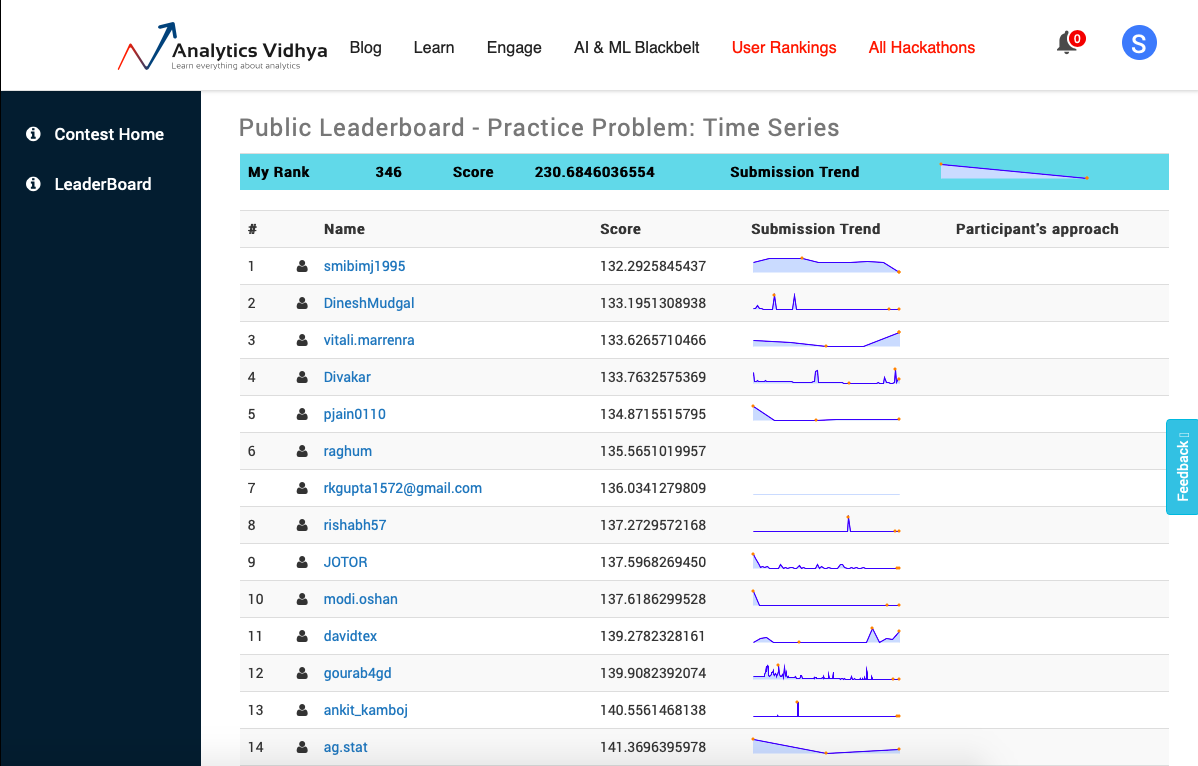

In [186]:
img